## Goal of this project
This project seeks to implement a golf ball flight simulator that is as close to the natural world as possible. This includes simple factors such as drag, gravity, and magnus effect. To more complicated features to implement such as sidespin, collisions with the ground with spin, and the affect of humidity on ball flight.

### Why this project?
I like to play golf, and I would really like to own one of the simulators in places like dick's sporting goods, Golf Galaxy, etc. This project seeks to be one part of making that simulator and I hope to finish the hardware portion (the camera and net to hit into) over the summer. 

### Background Information
#### Drag
Why do golf balls have dimples and how does that affect the aerodynamic properties of the golf ball? When a smooth ball flies through the air, the air that impacts the ball will deflect off to the side of the ball. This air will travel alongside the ball and not near its surface. This causes a low pressure zone behind the golf ball that acts like a vaccum sucking the golf ball back, in the same way f1 cars use low pressure zones to "suck" the car to the track. 

The dimples create turbulance on the surface of the ball which keeps the air closer to the ball as the vortices of air follow the turbuance. This in turn means that the air gets to the back of the ball and eliminates the low pressure zone, causing the ball to fly further.

#### Spin Axis
Golf balls (that are not topped) always have backspin. This spin also contains sidespin. Sidespin is very powerful in its usefulness to control the flight of the ball. It is also powerful in how a little bit of sidespin (lets say 5% of the total spin) can affect the flight of the ball. The difference between 4000rpm and 5000rpm (a 25% increase) is very subtle to the naked eye on backspin, but if we increase the sidespin by 25% then the ball becomes almost uncontrollable in terms of actually playing golf.

#### Bounces and Roll out
The bounce of the golf ball is dependent on 3 main factors; spin, landing angle, and firmness of the ground. The more spin the ball has, the steeper the landing, and the softer the ground will cause the ball to have a shorter roll out distance and vice versa.

### Direction vectors for reference

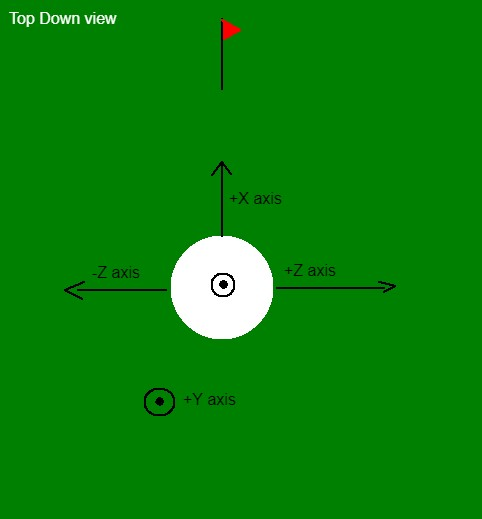

## Wall of Code
We have so code laying around from previous projects that can be used here and slightly modified to accept z axis movement later on.

In [1]:
import ode 
import numpy as np
import matplotlib.pyplot as plt
from vpython import *

<IPython.core.display.Javascript object>

In [2]:
g = 9.8 #N/kg
r = 21.335 #mm radius  
density = 1.225 #kg/m^3
m = 45.93 #grams
Cd = .205
spindecay = .04   #https://www.tutelman.com/golf/ballflight/spinDecay.php
# New Cd and Cl values were given in 3.6.2
g = 9.8 #N/kg
rho = 1.2 #kg/m^3
mu = 1.8e-5 #kg/m/s
r = 43e-3/2 #43 mm diameter, 270mm in circumference
A = np.pi*r**2 #cross-sectional area
Cd =  0 #.25*(1+1/(1+np.exp(2*vmag0-12)))
m = 0.0459 #kg
b2 = 1/2*Cd*rho*A #will change as Cd changes

S = 0.01 #will change as omega and v change
CL = 0 #.55*(S**.4) #will change with S
alpha = 1/2*CL*rho*A*r/S


# New Cd and Cl values were given in 3.6.2

In [30]:
def magnus(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
    
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    v = np.sqrt(vx**2+vy**2+vz**2)
    Cd =  .25*(1+1/(1+np.exp(2*v-12)))
    Fdragx = (-1/2)*Cd*rho*A*v**2 * vx/v
    Fdragy = (-1/2)*Cd*rho*A*v**2 * vy/v
    Fdragz = (-1/2)*Cd*rho*A*v**2 * vz/v
    
    #Fwindx = A*rho*Windx
    #Fwindz = A*rho*Windz
        
    Fgravy = -m*g
    
    #magnus
    S = r*omegamag/v
    CL = 0.55*S**0.4
    alpha = 1/2*CL*rho*A*r/S
    Fmagnusx = alpha*(omegay*vz - omegaz*vy)
    Fmagnusy = alpha*(omegaz*vx - omegax*vz)
    Fmagnusz = alpha*(omegax*vy - omegay*vx)
    
    Fnetx = Fdragx + Fmagnusx + Fwindx
    Fnety = Fgravy + Fdragy + Fmagnusy
    Fnetz = Fdragz + Fmagnusz #+ Fwindz
    
    dvxdt = Fnetx/m
    dvydt = Fnety/m
    dvzdt = Fnetz/m
    
    derivs = np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])
    
    return derivs   

In [ ]:
def simulate():
    t = 0 #time in s
    h = .01 #time step in s
    
    # initial position and velocity components
    x = 0
    y = 0
    z = 0
    vx = vmag0*np.cos(theta)
    vy = vmag0*np.sin(theta)
    vz = 0

    # array for instantaneous position and velocity data
    data = np.array([x, y, z, vx, vy, vz])

    

    # lists for storing data to graph
    tlist = []
    xlist = []
    ylist = []
    zlist = []

    # store initial values
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)

    # compute
    while y >= 0:

        data = ode.RK4(magnus, data, t, h)
        t = t + h
        
        x = data[0]
        y = data[1]
        z = data[2]
        tlist.append(t)
        xlist.append(x)
        ylist.append(y)
        zlist.append(z)

    scene = canvas(title="Range",background=color.white)
    ground = box(pos = vec(490, 0, 0), size = vec(1000, 1, 100), color=color.green)
    ball = sphere(pos = vec(0,1,0),radius = 1, color=color.red,make_trail=True,retain=1000,trail_radius=.3)
    #pole = box(pos=vec())
    scene.camera.axis = vec(12,0,0)
    scene.camera.fov = 100
    scene.camera.pos = vec(-26,5,2)
    scene.pause()
    size = len(tlist)
    i=0
    for i in range(size):
        rate(200)
        ball.pos.x = xlist[i]
        ball.pos.y = ylist[i]
        ball.pos.z = zlist[i]
        camvec = vec(ball.pos.x-25,ball.pos.y,ball.pos.z+10)
        scene.camera.pos = camvec
        scene.camera.center = ball.pos
    scene.camera.pos = vec(220,60,240)
    scene.camera.axis = vec(-10,-80,-160)

    print("Carry distance(yards): ",xlist[-1]*1.094)
    MH = max(ylist)
    print("Maximum Height(yards): ",MH*1.094)
    print("Off center(yards): ",abs(zlist[-1])*1.094)
    print("Flight time:",t)
    print
    
    scene.pause()
    scene.camera.pos = vec(-45,10,0)
    scene.camera.axis = vec(31,0,0)


# How to run
The cell below will ask for several parameters that are required to calcualte the flight of the ball. 
Not all are required however there is some important information as to how to enter parameters in order to avoid confusion of the results. 

Please enter all velocities in m/s. 

Spin axis is in degrees in relation to the centerline of the ball. A ball with no sidespin will have a spin axis of 0. You can think of the spin axis as a "lean" in the ball as it spins. The picture below shows how this spin axis looks along with some examples. Lower numbers are more realistic such as .05 or .1, those values represent 5% and 10% "lean" to the right respectively. Positive Numbers lean to the right and negative numbers lean to the left.

Wind direction uses degrees in a custom way. 0 is tailwind, 180 is headwind, and the degrees increment from right to left. For example if I were to put in 97 degrees as my wind direction then the wind would be blowing right to left with a slight bit of headwind. 


In [37]:
#Questions for input data
thetadeg = float(input("Launch angle in degrees  "))
vmag0 = float(input("Initial velocity of ball m/s  "))
spinrate = float(input("Initial spinrate rpm   "))
spinaxis = float(input("Spin Axis  "))
# wind = float(input("Wind velocity m/s  "))
# winddirection = float(input("Wind Direction  "))
# wind is currently commented out as I messed up the direction a few days ago and havent fixed it yet
# convert units and create initial conditions
theta = thetadeg*np.pi/180 #convert deg to rad


# initial angular speed and velocity (Note: these x y and z do not correspond with the x,y,and z planes of the simulation)
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
spinaxis = spinaxis *-1
omegax = 0
omegay = omegamag*spinaxis
omegaz = omegamag*(1-spinaxis)


#Wind direction manipulation to pass to simulation

# if winddirection 
# else if winddirection==180
#     Windx = -wind
#     Windz = 0
# Windz = wind*
simulate()


Launch angle in degrees  12.6
Initial velocity of ball m/s  80
Initial spinrate rpm   2340
Spin Axis  -.05
Wind velocity m/s  0


<IPython.core.display.Javascript object>

Carry distance(yards):  298.65484304617513
Maximum Height(yards):  52.85221613113867
Off center(yards):  9.53854074799122
Flight time: 8.329999999999867


## Assumptions
Density of golf ball is uniform throughout. However this only affects the how the ball would react to being hit and not how it flies through the air. 

Uniform wind. It is generally true that wind is generally quicker above the tree line, however it this simulator is supposed to correctly identify the exact ball flight of ideal conditions including wind. [Wind](https://www.quora.com/What-is-the-average-wind-speed-at-different-altitudes)



## Trackman
Trackman is one the most widely known and used golf flight simulator in the world. I went to Golf Galaxy and hit some balls to compare my simulation to theirs (with some minor hiccups in the process).

  An interesting note for the data is that under every number that popped up was a faint gray +- symbol with a number beside it. This number could sometimes be pretty significant which seemed shady to me that it is not made obvious that the results are not 100% accurate. I will let you know first hand that I don't know if this simulation is as perfect as a range session. However, with that said, my goal of this project was not to sell golf clubs or make myself seem good during lessons. This project has the sole intention of being as accurate as possible for myself as a practice tool and any tampering with the results would hurt myself as a scientist and golfer.

# In Conclusion
In conclusion, this final project seems to be about 1-2% off on yardages for shorter shots and up to 4% off on much longer shots(300+ yards). It pains me to say that I can not at this time find the issus that casues this inconsistency. As I stated earlier any inconsistency is not there on purpose for any financial gain. Overall, this small bit of inconsistency does not take away from the power of this program as a practice tool. It may not be up to the standards of the practice simulators that the pros may use but for the average golfer it is more than enough. I am excited to see how far I can take this project over the summer and hope to get a full working simulator with hardware input.

### References 
https://www.tutelman.com/golf/ballflight/spinDecay.php

https://www.golf-simulators.com/physics.htm

https://www.quora.com/What-is-the-average-wind-speed-at-different-altitudes
